In [1]:
# append parent to path to allow imports
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent)) 

In [2]:


from pathlib import Path
import cv2
import numpy as np

from src.face import FaceDetector
from src.mask import MaskHandler
from src.projectUtils import Utils
from src.superpixels import SuperpixelExtractor, FeatureExtractor
from src.region import FeatureDivergence

In [3]:
fd = FaceDetector("../assets/lbfmodel.yaml")
mh = MaskHandler()

IMAGE_PATH = Path('test_images/face.jpg')

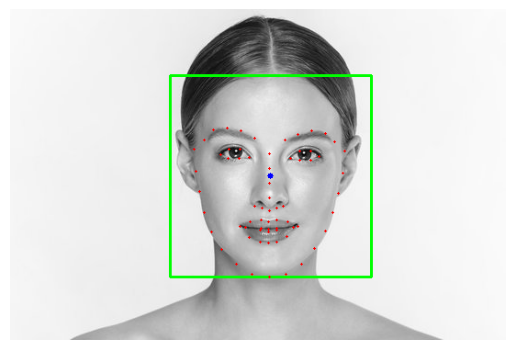

In [4]:
img_rgb, _, _, landmarks_all_faces = fd.detect(IMAGE_PATH)
Utils.display(img_rgb)

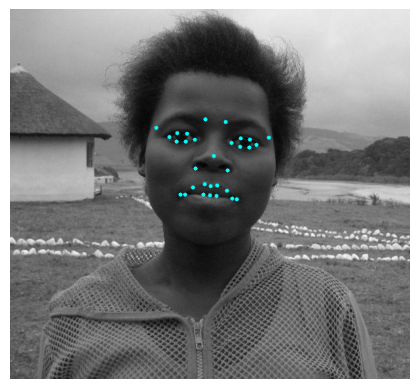

1


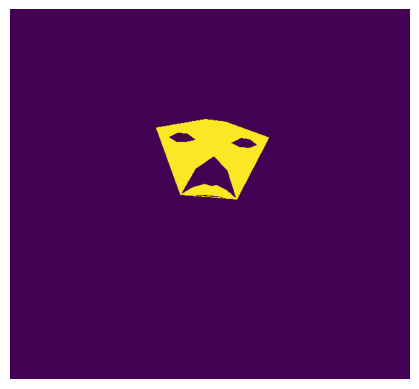

In [8]:
masked_img, selected_pts = mh.get_mask_points(IMAGE_PATH, landmarks_all_faces)
Utils.display(masked_img)

masks, masked_imgs = mh.build_masks(IMAGE_PATH, selected_pts)
print(len(masks))
Utils.display(masks[0])

1


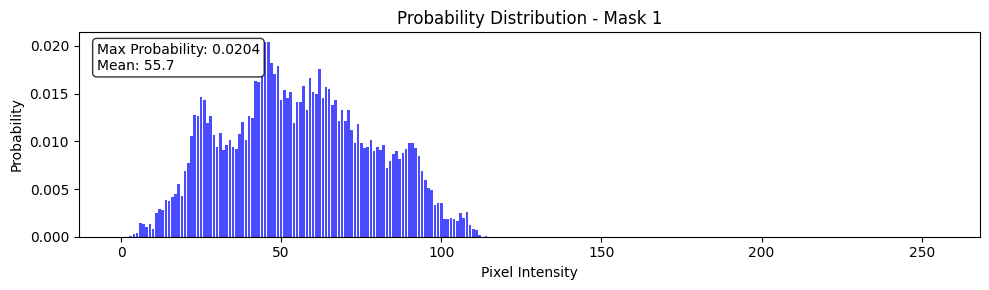

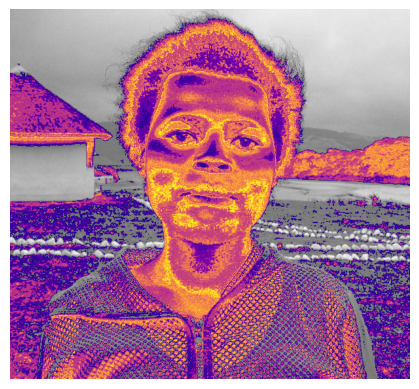

In [9]:
intensity_histograms = mh.get_intensity_histograms(IMAGE_PATH, masks)

print(len(intensity_histograms))
Utils.visualize_histograms(intensity_histograms)
Utils.apply_intensity_probability_map(IMAGE_PATH, intensity_histograms[0])

1
1
1


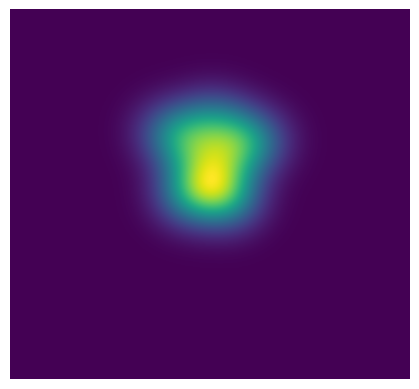

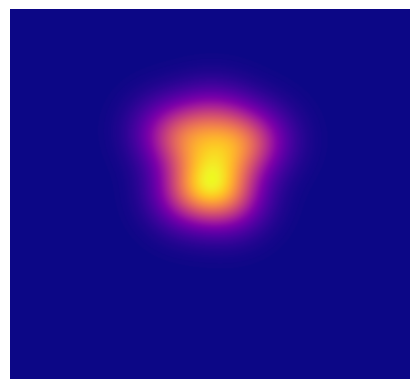

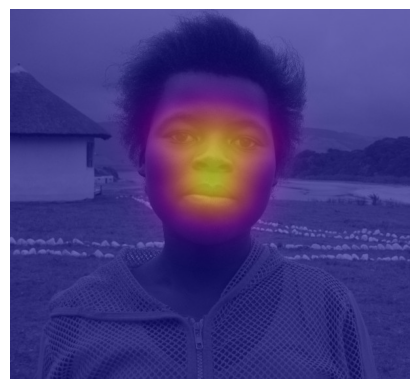

In [10]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(IMAGE_PATH, selected_pts)

print(len(prior_face_masks))
print(len(heatmaps))
print(len(heatmaps_blended))

idx = 0

Utils.display(prior_face_masks[idx])
Utils.display(heatmaps[idx])
Utils.display(heatmaps_blended[idx])

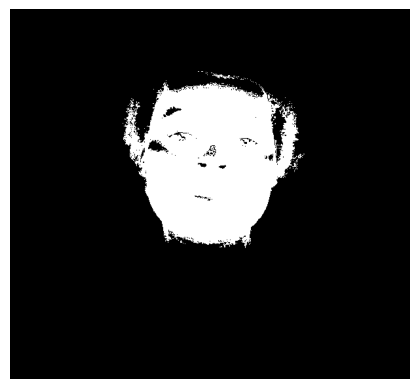

In [11]:
alpha = 0.69
lambda_ = 0.0018

skin_pixel_maps = mh.get_skin_pixel_maps(IMAGE_PATH, intensity_histograms, prior_face_masks, alpha, lambda_)

for i in skin_pixel_maps:
    Utils.display(i, cmap="gray")

In [12]:
spe = SuperpixelExtractor()
fe = FeatureExtractor()

slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

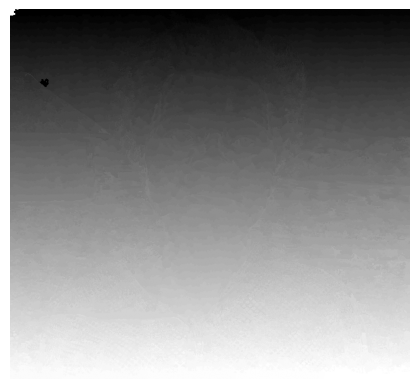

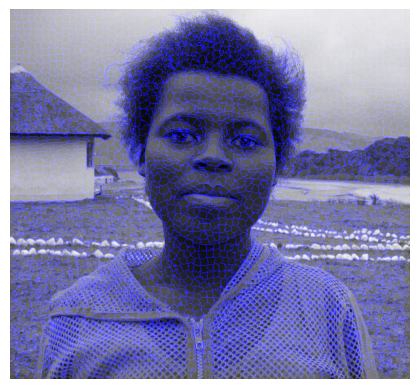

In [13]:
Utils.display(labels, cmap="gray")
Utils.display(contoured_img)

In [18]:
feature_vectors_sp = fe.extract_all_features_superpixels(IMAGE_PATH, slic)
print(feature_vectors_sp)

[{'label': 0, 'mean_intensity': 147.77570093457945, 'std_intensity': 2.431523545368494, 'entropy': 3.1085840874922583, 'lacunarity_vector': array([0.86915888, 0.69158879, 0.8317757 , 0.78504673, 0.75700935,
       0.76635514, 0.95327103, 0.85981308, 0.85981308, 0.90654206,
       0.87850467, 0.94392523, 0.87850467, 0.85981308, 0.98130841,
       0.93457944, 0.91588785, 0.90654206, 0.96261682, 0.94392523,
       0.95327103, 0.92523364, 0.82242991, 0.77570093, 0.71962617,
       0.75700935, 0.78504673, 0.8411215 , 0.93457944, 0.91588785,
       0.82242991, 0.85981308, 0.88785047, 0.91588785, 0.87850467,
       0.91588785, 0.96261682, 0.97196262, 0.96261682, 0.87850467,
       0.96261682, 0.88785047, 0.97196262, 0.97196262])}, {'label': 1, 'mean_intensity': 170.73636363636365, 'std_intensity': 1.5936081001486853, 'entropy': 2.376018806390931, 'lacunarity_vector': array([0.92727273, 0.65454545, 0.8       , 0.77272727, 0.85454545,
       0.84545455, 0.97272727, 0.94545455, 0.91818182, 0.872

In [19]:
feature_vector = fe.extract_all_features_mask(IMAGE_PATH, skin_pixel_maps[0])
print(feature_vector)

{'mean_intensity': 53.69232825447741, 'std_intensity': 20.327991089353485, 'entropy': 3.3663507213088852, 'lacunarity_vector': array([0.87730553, 0.58974873, 0.89013633, 0.81502272, 0.62349639,
       0.89316582, 0.94638243, 0.76202887, 0.93029939, 0.92196828,
       0.94359797, 0.77782233, 0.92724762, 0.94814221, 0.97870445,
       0.88828745, 0.97705605, 0.94417714, 0.98229083, 0.86345006,
       0.97770204, 0.97816983, 0.82317562, 0.65053907, 0.88160474,
       0.81058986, 0.60462889, 0.90786777, 0.94123675, 0.7891161 ,
       0.92452998, 0.930834  , 0.94925599, 0.75133654, 0.93526686,
       0.9585895 , 0.97881582, 0.88565891, 0.97465027, 0.96420298,
       0.98135525, 0.85915085, 0.97591999, 0.98075381])}
